In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [9]:
data = pd.read_csv("test_df_en.csv", sep=";")
data = data.drop(data.columns[0], axis=1)

In [3]:
stop_words = set(stopwords.words('english'))
stop_words.update(['I', 'aye', 'oh', 'ho', 'uh', 'yeah','wa','hey','da','duh','ooh','ohh',
                   'la','yo','ya','na'])
lemmatizer = WordNetLemmatizer()
# Function to drop non-letter characters
def drop_non_letters(text):
    return re.sub(r'[^a-zA-Z]', ' ', text)

for i in range(len(data)):
    chanson = drop_non_letters(data.iloc[i]['lyrics'])
    word_tokens = word_tokenize(chanson)
    
    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in word_tokens]
    
    # Remove stopwords
    filtered_sentence = [w for w in lemmatized_words if w not in stop_words]
    
    # Update the 'lyrics' column with filtered and lemmatized tokens
    data.at[i, 'lyrics'] = filtered_sentence
    
print(filtered_sentence)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3457, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10272\2300293933.py", line 14, in <module>
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in word_tokens]
  File "C:\Users\Admin\AppData\Local\Temp\ipykernel_10272\2300293933.py", line 14, in <listcomp>
    lemmatized_words = [lemmatizer.lemmatize(word.lower()) for word in word_tokens]
  File "C:\Users\Admin\anaconda3\lib\site-packages\nltk\stem\wordnet.py", line 45, in lemmatize
    lemmas = wn._morphy(word, pos)
  File "C:\Users\Admin\anaconda3\lib\site-packages\nltk\corpus\reader\wordnet.py", line 2008, in _morphy
    exceptions = self._exception_map[pos]
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\lib\site

TypeError: object of type 'NoneType' has no len()

In [13]:
# Create dictionary and corpus
dictionary = corpora.Dictionary(data['selected'])
corpus = [dictionary.doc2bow(text) for text in data['selected']]

# Apply LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

# Get the topic distribution for each document
topic_distribution = lda_model[corpus]

# Add topic distribution to DataFrame
data['topic_distribution'] = topic_distribution

Topic: 0 
Words: 0.013*"world" + 0.010*"fight" + 0.009*"soul" + 0.008*"everybody" + 0.008*"whoa" + 0.007*"life" + 0.007*"dance" + 0.007*"power" + 0.007*"many" + 0.006*"dum"
Topic: 1 
Words: 0.017*"life" + 0.015*"time" + 0.013*"word" + 0.010*"jump" + 0.008*"slow" + 0.007*"call" + 0.006*"cause" + 0.006*"walk" + 0.006*"nothing" + 0.006*"right"
Topic: 2 
Words: 0.010*"man" + 0.009*"nigga" + 0.009*"niggas" + 0.009*"shit" + 0.009*"cause" + 0.007*"hip" + 0.007*"wanna" + 0.007*"em" + 0.006*"hop" + 0.006*"real"
Topic: 3 
Words: 0.021*"time" + 0.020*"love" + 0.018*"baby" + 0.018*"way" + 0.012*"night" + 0.011*"gonna" + 0.011*"heart" + 0.011*"cause" + 0.011*"wanna" + 0.010*"good"
Topic: 4 
Words: 0.045*"high" + 0.020*"ah" + 0.013*"wild" + 0.011*"music" + 0.011*"baby" + 0.010*"home" + 0.009*"time" + 0.008*"du" + 0.006*"night" + 0.006*"rock"


In [12]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

stop_words = set(stopwords.words('english'))
stop_words.update(['I', 'aye', 'oh', 'ho', 'uh', 'yeah','wa','hey','da','duh','ooh','ohh',
                   'la','yo','ya','na'])
def filter_adjectives_nouns(text):
    # Tokenize le texte
    tokenizer = RegexpTokenizer(r'\w+')
    words = tokenizer.tokenize(text)
    words = [word.lower() for word in words if word.lower() not in stop_words ]

    pos_tags = pos_tag(words)

    adjectives_nouns = [word for word, pos in pos_tags if pos.startswith('NN') or pos.startswith('JJ')]

    return adjectives_nouns

In [11]:
data['selected'] = data['lyrics'].apply(filter_adjectives_nouns)

In [16]:
data.to_csv("lda_v1.csv")

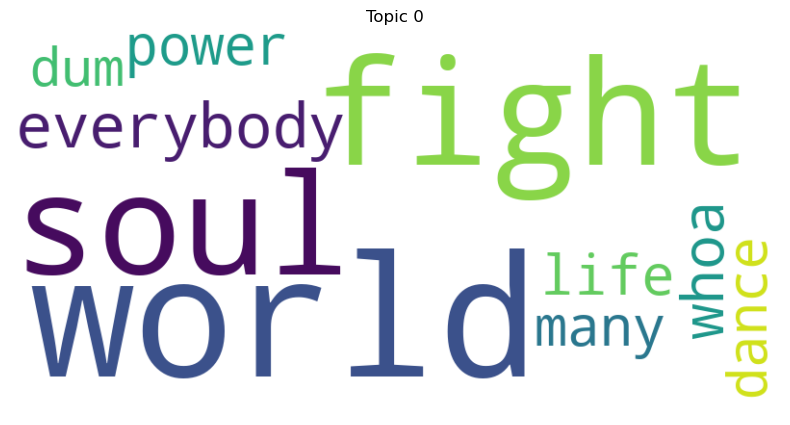

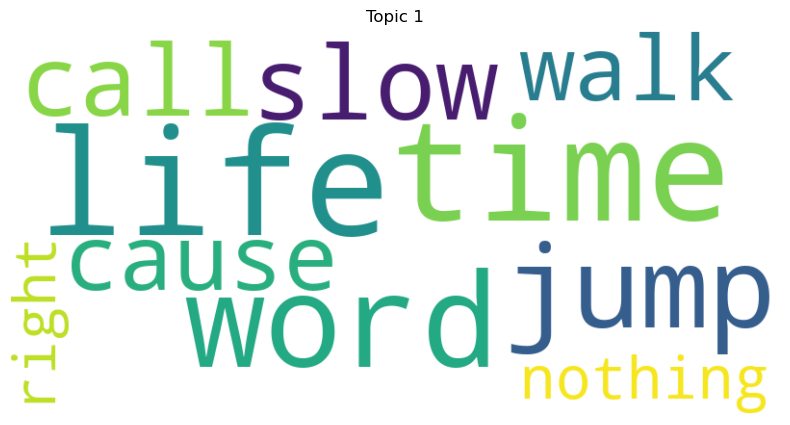

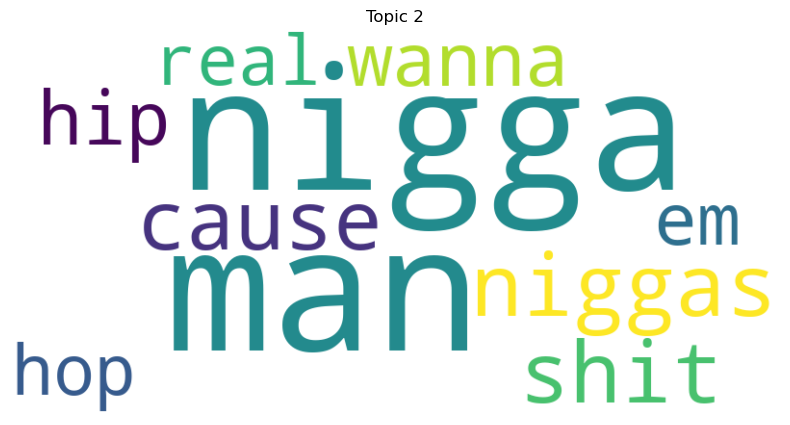

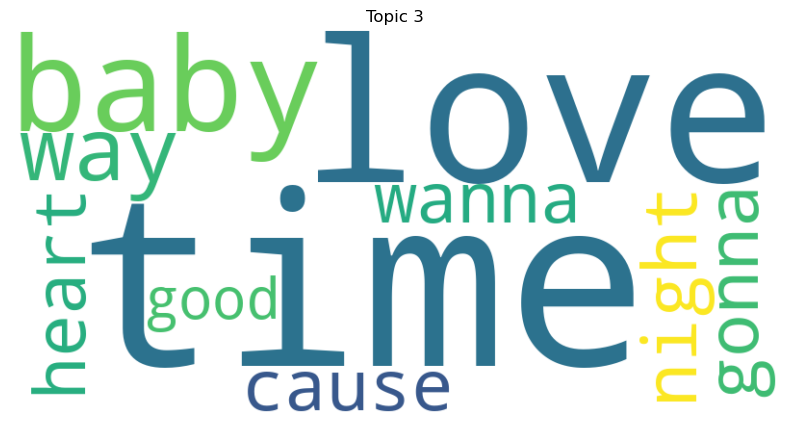

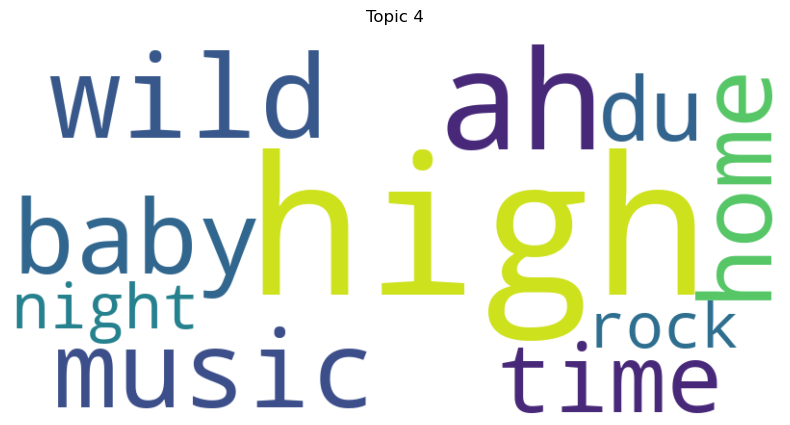

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming 'lda_model' is your trained LDA model
topics = lda_model.show_topics(formatted=False)

# Plot word clouds for each topic
for topic_id, words in topics:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()
